https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202

https://thatbrguy.github.io/

https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/

![Inception_block](Inception_block.png)

<h1>Inception v1

- Salient parts in the image can have an extremely large variation in size. For instance, an image with a dog can be either of the following, as shown below. The area occupied by the dog is different in each image.

- Because of this huge variation in the location of the information, choosing the right kernel size for the convolution operation becomes tough. A larger kernel is preferred for information that is distributed more globally, and a smaller kernel is preferred for information that is distributed more locally.

- Very deep networks are prone to overfitting. It is also hard to pass gradient updates through the entire network

- Naively stacking large convolution operations is computationally expensive.
 

***Inception V1 solves this through:***

- ****with multiple sized filters operating on the same level****

- ****going wider to capture different GRF contexts****

- ****not using addition, but concatenation to make sure GRF links are maintained till the SoftMax layer****


    This is where it all started. Let us analyze what problem it was purported to solve, and how it solved it. 

***The Premise:***

`Salient parts in the image can have extremely large variation in size. For instance, an image with a dog can be either of the following, as shown below. The area occupied by the dog is different in each image.`

![dog](dog.png)

*From left: A dog occupying most of the image, a dog occupying a part of it, and a dog occupying very little space* 

    Because of this huge variation in the location of the information, choosing the right kernel size for the convolution operation becomes tough. 
    
 ***`A larger kernel is preferred for information that is distributed more globally, and a smaller kernel is preferred for information that is distributed more locally.`***

    Very deep networks are prone to overfitting. It also hard to pass gradient updates through the entire network.

    Naively stacking large convolution operations is computationally expensive.

***The Solution:***

    Why not have filters with multiple sizes operate on the same level? The network essentially would get a bit “wider” rather than “deeper”. The authors designed the inception module to reflect the same.
    
    The below image is the “naive” inception module. It performs convolution on an input, with 3 different sizes of filters (1x1, 3x3, 5x5). Additionally, max pooling is also performed. The outputs are concatenated and sent to the next inception module.

![V1_arch](v1.png)

    As stated before, deep neural networks are computationally expensive. To make it cheaper, the authors limit the number of input channels by adding an extra 1x1 convolution before the 3x3 and 5x5 convolutions. Though adding an extra operation may seem counterintuitive, 1x1 convolutions are far more cheaper than 5x5 convolutions, and the reduced number of input channels also help. 
   
`Do note that however, the 1x1 convolution is introduced after the max pooling layer, rather than before.`

![V1_dimension_reduced](v1_dimension_reduction.png)

`Using the dimension reduced inception module, a neural network architecture was built. This was popularly known as GoogLeNet (Inception v1).`

#### Google Net reference : ( 27 Layers )

https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/googlenet.html

`GoogLeNet has 9 such inception modules stacked linearly. It is 22 layers deep (27, including the pooling layers). It uses global average pooling at the end of the last inception module.
Needless to say, it is a pretty deep classifier. As with any very deep network, it is subject to the` ***`vanishing gradient problem`***.

    To prevent the middle part of the network from “dying out”, the authors introduced two auxiliary classifiers. They essentially applied softmax to the outputs of two of the inception modules, and computed an auxiliary loss over the same labels. The total loss function is a weighted sum of the auxiliary loss and the real loss. Weight value used in the paper was 0.3 for each auxiliary loss.

In [ ]:
# The total loss used by the inception net during training.

total_loss = real_loss + 0.3 * aux_loss_1 + 0.3 * aux_loss_2

***Needless to say, auxiliary loss is purely used for training purposes, and is ignored during inference.***

<h1>Inception V2

`Inception v2 and Inception v3 were presented in the same paper. The authors proposed a number of upgrades which increased the accuracy and reduced the computational complexity. Inception v2 explores the following:`

***The Premise:***

`Reduce representational bottleneck. The intuition was that, neural networks perform better when convolutions didn’t alter the dimensions of the input drastically. Reducing the dimensions too much may cause loss of information, known as a` ***`“representational bottleneck”`***

    Using smart factorization methods, convolutions can be made more efficient in terms of computational complexity.
    
***The Solution:***

- `"Factorize 5x5" convolution to two 3x3 convolution operations to improve computational speed. Although this may seem counterintuitive, `***`a 5x5 convolution is 2.78 times more expensive than a 3x3 convolution`***. `So stacking two 3x3 convolutions infact leads to a boost in performance.`

    This is illustrated in the below image.
    
![Inception_V1_2_3x3_(5x5)](V1_2_3x3.png)

- `Moreover, they "factorize convolutions of filter size nxn" to a combination of 1xn and nx1 convolutions. For example, a 3x3 convolution is equivalent to first performing a 1x3 convolution, and then performing a 3x1 convolution on its output. They found this method to be 33% more cheaper than the single 3x3 convolution.`

    This is illustrated in the below image.
    
![V1_nxn_1xn_nx1](V1_nxn_1xn_nx1.png)

***`The filter banks in the module were expanded (made wider instead of deeper) to remove the representational bottleneck. If the module was made deeper instead, there would be excessive reduction in dimensions, and hence loss of information.`***

     This is illustrated in the below image.
     
![V2](Inception_v2.png)

<h1>Inception v3

***The Premise :***

`The authors noted that the auxiliary classifiers didn’t contribute much until near the end of the training process, when accuracies were nearing saturation. They argued that they function as regularizes, especially if they have BatchNorm or Dropout operations.`

    Possibilities to improve on the Inception v2 without drastically changing the modules were to be investigated.

***The Solution :***

`Inception Net v3 incorporated all of the above upgrades stated for Inception v2, and in addition used the following:`

    RMSProp Optimizer.
    
    Factorized 7x7 convolutions.
    
    BatchNorm in the Auxillary Classifiers.
    
    Label Smoothing (A type of regularizing component added to the loss formula that prevents the network from becoming too confident about a class. Prevents over fitting).

<h1>Inception v4

 ***`Insanity : Repeating the same mistakes over and over again and expecting different results`***

`Inception v4 and Inception-ResNet were introduced in the same paper. For clarity, let us discuss them in separate sections.`

***The Premise :***

- `Make the modules more uniform. The authors also noticed that some of the modules were more complicated than necessary. This can enable us to boost performance by adding more of these uniform modules.`

***The Solution :***

- `The “stem” of Inception v4 was modified. The stem here, refers to the initial set of operations performed before introducing the Inception blocks.`

![Inception_V4](Inception_v4.jpeg)

*The top image is the stem of Inception-ResNet v1. The bottom image is the stem of Inception v4 and Inception-ResNet v2.* 

***`They had three main inception modules, named A,B and C (Unlike Inception v2, these modules are infact named A,B and C). They look very similar to their Inception v2 (or v3) counterparts.`***

![Inception_V4_blocks](inception_v4_A_B_C.jpeg)

*(From left) Inception modules A,B,C used in Inception v4. Note how similar they are to the Inception v2 (or v3) modules.*

- `Inception v4 introduced specialized`***`“Reduction Blocks”`***` which are used to change the width and height of the grid. The earlier versions didn’t explicitly have reduction blocks, but the functionality was implemented.`

<h1>ResNet : 

https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

![ResNet Model](resnet.png)

    Inspired by the performance of the ResNet, a hybrid inception module was proposed. There are two sub-versions of Inception ResNet, namely v1 and v2. Before we checkout the salient features, let us look at the minor differences between these two sub-versions.
    
- `Inception-ResNet v1 has a computational cost that is similar to that of Inception v3.`


- `Inception-ResNet v2 has a computational cost that is similar to that of Inception v4.`

    They have different stems, as illustrated in the Inception v4 section.

`Both sub-versions have the same structure for the modules A, B, C and the reduction blocks.`***`Only difference is the hyper-parameter settings`***. `In this section, we’ll only focus on the structure. Refer to the paper for the exact hyper-parameter settings (The images are of Inception-Resnet v1).`

***There are two kinds of residual connections:***

![residual_block](residual_block.png)

- `1. The identity shortcuts (x) can be directly used when the input and output are of the same dimensions.`

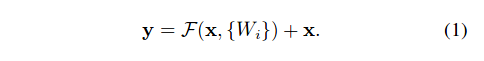

*Residual block function when input and output dimensions are same*

- `2. When the dimensions change,` 

`A) The shortcut still performs identity mapping, with extra zero entries padded with the increased dimension.` 

`B) The projection shortcut is used to match the dimension (done by 1*1 conv)`

*using the following formula*

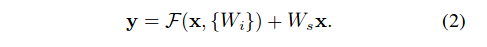

    Residual block function when the input and output dimensions are not same.

***`The first case adds no extra parameters, the second one adds in the form of W_{s}`***

<h3>ResNet Architectures :

![ResNetArchitectures](resnet_architectures.png)

`Each ResNet block is either 2 layer deep (Used in small networks like ResNet 18, 34) or 3 layer deep( ResNet 50, 101, 152).`


![ResNet_2_3_layers_block](resnet_2_3_layers.png)

- `The Bottleneck class implements a 3 layer block and Basicblock implements a 2 layer block. It also has implementations of all ResNet Architectures with pretrained weights trained on ImageNet.`

***Observations:***

    ResNet Network Converges faster compared to plain counter part of it.

    Identity vs Projection shorcuts. Very small incremental gains using projection shortcuts (Equation-2) in all the layers. So all ResNet blocks use only Identity shortcuts with Projections shortcuts used only when the dimensions changes.

    ResNet-34 achieved a top-5 validation error of 5.71% better than BN-inception and VGG. ResNet-152 achieves a top-5 validation error of 4.49%. An ensemble of 6 models with different depths achieves a top-5 validation error of 3.57%. Winning the 1st place in ILSVRC-2015